# Import and Process Data

In [1]:
import os

# Get list of authors
train_directory = './C50/C50train'
test_directory = './C50/C50test'
authors = set()
for filename in os.listdir(train_directory):
    authors.add(filename)
# Remove this line if there are errors thrown
authors.remove(".DS_Store")
# Just take 10 authors
authors = sorted(list(authors))[:10]
print(len(authors))

10


In [2]:
# train and test are dictionaries
# keys are the 10 authors
# values are the 50 texts written by the author
train = {}
test = {}
for author in authors:
    train[author] = []
    test[author] = []
for author in authors:
    for filename in os.listdir(train_directory + "/" + author):
        f = open(train_directory + "/" + author + "/" + filename, "r")
        train[author].append(f.read())
        f.close()
    for filename in os.listdir(test_directory + "/" + author):
        f = open(test_directory + "/" + author + "/" + filename, "r")
        test[author].append(f.read())
        f.close()
print(len(train[authors[0]]))
print(len(test[authors[0]]))

50
50


In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
splitter = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer = nltk.tokenize.TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

def tokenise(text):
    ret = []
    sentences = splitter.tokenize(text)
    for sentence in sentences:
        token_list = tokenizer.tokenize(sentence)
        for token in token_list:
            ret.append(token.lower())
    return ret

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # As default pos in lemmatization is Noun
        return wordnet.NOUN

def process_text(text):
    token_list = tokenise(text)
    # Pos Tag
    pos = nltk.pos_tag(token_list)
    # Lemmatize
    return [lemmatizer.lemmatize(word,get_wordnet_pos(pos_tag)) for (word,pos_tag) in pos]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erictay1997/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/erictay1997/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
def tokenise_2(text):
    sentences = splitter.tokenize(text)
    tokenized_sentences = [tokenizer.tokenize(sentence) for sentence in sentences]
    for tokenized_sentence in tokenized_sentences:
        for i in range(len(tokenized_sentence)):
            tokenized_sentence[i] = tokenized_sentence[i].lower()
    return tokenized_sentences

def process_text_2(text):
    list_of_token_lists = tokenise_2(text)
    for i in range(len(list_of_token_lists)):
        token_list = list_of_token_lists[i]
        # Pos Tag
        pos = nltk.pos_tag(token_list)
        # Lemmatize
        list_of_token_lists[i] = [lemmatizer.lemmatize(word,get_wordnet_pos(pos_tag)) for (word,pos_tag) in pos]
    return list_of_token_lists

In [5]:
# process_text converts a text into a list of tokens
print(process_text(train[authors[0]][0]))
# process_text_2 converts a text into a list of sentences 
# each sentence is converted into a list of tokens
print(process_text_2(train[authors[0]][0]))

['a', 'group', 'of', 'lead', 'trademark', 'specialist', 'plan', 'to', 'release', 'recommendation', 'aim', 'at', 'minimize', 'dispute', 'over', 'internet', 'address', 'name', '.', 'the', 'international', 'trademark', 'association', 'be', 'work', 'on', 'a', 'white', 'paper', 'that', 'will', 'be', 'complete', 'in', 'the', 'next', 'few', 'month', ',', 'david', 'maher', ',', 'co-chair', 'of', 'the', 'association', "'s", 'internet', 'issue', 'committee', ',', 'say', 'in', 'a', 'telephone', 'interview', '.']
[['a', 'group', 'of', 'lead', 'trademark', 'specialist', 'plan', 'to', 'release', 'recommendation', 'aim', 'at', 'minimize', 'dispute', 'over', 'internet', 'address', 'name', '.'], ['the', 'international', 'trademark', 'association', 'be', 'work', 'on', 'a', 'white', 'paper', 'that', 'will', 'be', 'complete', 'in', 'the', 'next', 'few', 'month', ',', 'david', 'maher', ',', 'co-chair', 'of', 'the', 'association', "'s", 'internet', 'issue', 'committee', ',', 'say', 'in', 'a', 'telephone', '

In [6]:
# train_processed, test_processed, train_processed2, test_processed2 are dictionaries
# keys are the 50 authors
# values are 50 token lists written by the author
train_processed = {}
test_processed = {}
train_processed_2 = {}
test_processed_2 = {}
for i in range(len(authors)):
    author = authors[i]
    print(i)
    train_processed[author] = [process_text(text) for text in train[author]]
    test_processed[author] = [process_text(text) for text in test[author]]
    train_processed_2[author] = [process_text_2(text) for text in train[author]]
    test_processed_2[author] = [process_text_2(text) for text in test[author]]

0
1
2
3
4
5
6
7
8
9


# EDA

In [7]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

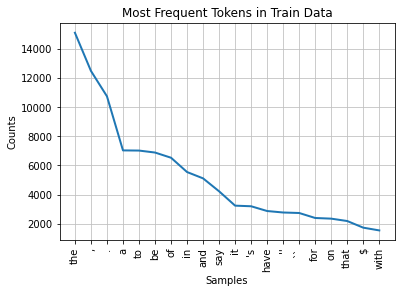

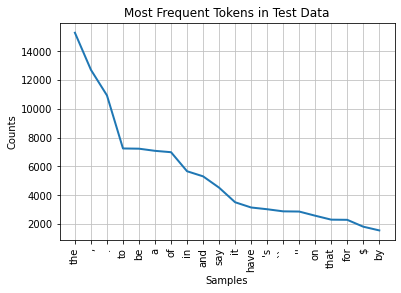

<AxesSubplot:title={'center':'Most Frequent Tokens in Test Data'}, xlabel='Samples', ylabel='Counts'>

In [8]:
# Most common words in train and test
train_words = []
test_words = []
for author in authors:
    for document in train_processed[author]: 
        for token in document: 
            train_words.append(token)
    for document in test_processed[author]:
        for token in document:
            test_words.append(token)
nltk.FreqDist(train_words).plot(20, title = "Most Frequent Tokens in Train Data")
nltk.FreqDist(test_words).plot(20, title = "Most Frequent Tokens in Test Data")

In [9]:
train_no_sentences = []
test_no_sentences = []
for author in authors:
    for document in train[author]: 
        train_no_sentences.append(len(splitter.tokenize(document)))
    for document in test[author]:
        test_no_sentences.append(len(splitter.tokenize(document)))
print("Number of sentences in documents with fewest sentences")
print("Train Data: {}".format(sorted(train_no_sentences)[:10]))
print("Test Data: {}".format(sorted(test_no_sentences)[:10]))

Number of sentences in documents with fewest sentences
Train Data: [2, 2, 3, 3, 3, 4, 4, 6, 7, 7]
Test Data: [3, 4, 7, 7, 9, 9, 9, 10, 10, 10]


In [10]:
print("Average number of tokens in documents")
print("Train Data: {}".format(np.mean([np.mean([len(text) for text in train_processed[author]]) for author in authors])))
print("Test Data: {}".format(np.mean([np.mean([len(text) for text in test_processed[author]]) for author in authors])))

Average number of tokens in documents
Train Data: 578.596
Test Data: 595.0959999999999


# Step 2(a) Generate Synthetic Train and Test

In [11]:
#backoff is a list 
#backoff[0] is a Counter
#backoff[1] is a dic - word : Counter
#backoff[2+] is a dic - tuple of words : Counter

def generate_backoff(n, corpura):
    # Create backoff list
    backoff = []
    backoff.append(Counter())
    for corpus in corpura:
        backoff[0] += Counter(corpus)
    # Handle 2-gram case
    dic = {}
    for corpus in corpura:
        for i in range(0,len(corpus)-1):
            prefix = corpus[i]
            next_word = corpus[i+1]
            if prefix not in dic:
                dic[prefix] = Counter()
            if next_word not in dic[prefix]:
                dic[prefix][next_word] = 0
            dic[prefix][next_word] += 1
    backoff.append(dic)
    # Handle 3-grams to n-grams
    for j in range(2, n):
        dic = {}
        for corpus in corpura:
            for i in range(0,len(corpus)-j):
                prefix = tuple(corpus[i:i+j])
                next_word = corpus[i+j]
                if prefix not in dic:
                    dic[prefix] = Counter()
                if next_word not in dic[prefix]:
                    dic[prefix][next_word] = 0
                dic[prefix][next_word] += 1
        backoff.append(dic)
    return backoff

In [12]:
n = 6
# train_backoff is a dict
# where keys are authors
# and values are the backoff lists for that author
train_backoff = {}
for author in authors:
    train_backoff[author] = generate_backoff(n, train_processed[author])

In [13]:
def find_token(counter):
    counts = np.array(list(counter.values()))
    p = counts/sum(counts)
    return np.random.choice(np.array(list(counter.keys())), size = 1, p = p)[0]

In [14]:
def create_token(sentence, backoff, n):
    if n > 1:
        initial_prefix = sentence[-(n-1):]
    else:
        initial_prefix = []
    found_token = False
    while not found_token:
        length = len(initial_prefix)
        if length > 1:
            if tuple(initial_prefix) in backoff[length]:
                found_token = True
                return find_token(backoff[length][tuple(initial_prefix)])
            initial_prefix = initial_prefix[1:]
        if length == 1:
            if initial_prefix[0] in backoff[length]:
                found_token = True
                return find_token(backoff[length][initial_prefix[0]])
            initial_prefix = []
        else:
            return find_token(backoff[0])

In [15]:
def generate_text(train_backoff, n, length):
    sentence = []
    while True:
        token = create_token(sentence, train_backoff, n)
        sentence.append(token)
        if len(sentence) == length:
            return sentence

In [16]:
# Generate synthetic data
length_of_text = 600
texts_per_author = 50
n = 6
np.random.seed(0)
synthetic_text_train = {}
synthetic_text_test = {}

for author in authors:
    print(author)
    synthetic_text_train[author] = []
    synthetic_text_test[author] = []
    for i in range(texts_per_author):
        synthetic_text_train[author].append(generate_text(train_backoff[author], n, length_of_text))
        synthetic_text_test[author].append(generate_text(train_backoff[author], n, length_of_text))

AaronPressman
AlanCrosby
AlexanderSmith
BenjaminKangLim
BernardHickey
BradDorfman
DarrenSchuettler
DavidLawder
EdnaFernandes
EricAuchard


In [17]:
# Text is realistic

from nltk.tokenize.treebank import TreebankWordDetokenizer
twd = TreebankWordDetokenizer()
twd.detokenize(synthetic_text_train[authors[0]][0][:63])

"leach introduce in the previous congress founder last june amid opposition from the insurance industry and house democrat . analyst have say this year's bill might have a good chance of passage, but that be before leach decide to oppose newt gingrich's reelection a speaker of the house, a move that could turn the leadership against his bill."

# Step 2(b) Probabilistic Solution

In [18]:
def log_probability(tokens, backoff, n, weight_on_prefix, weight_on_unk):
    log_prob = 0
    for i in range(len(tokens)):
        target_token = tokens[i][0]
        prefix = tokens[max(i-n+1,0):i]
        while len(prefix) > 0:
            length_of_prefix = len(prefix)
            if length_of_prefix == 1:
                prefix = prefix[0]
            else:
                prefix = tuple(prefix)
            if prefix in backoff[length_of_prefix] and target_token in backoff[length_of_prefix][prefix]:
                counter = backoff[length_of_prefix][prefix]
                log_prob += np.log(weight_on_prefix*length_of_prefix*counter[target_token]/sum(counter.values()))
                break
            else:
                if length_of_prefix == 1:
                    break
                prefix = list(prefix)[1:]
        if len(prefix) == 0:
            if target_token in backoff[0]:
                log_prob += np.log(backoff[0][target_token]/sum(backoff[0].values()))
            else:
                # low prob when encountering a new word
                log_prob += np.log(weight_on_unk)
    return log_prob

# Step 3 Neural Network Solution

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
np.random.seed(0)
torch.manual_seed(0)

In [20]:
class FindAuthor(nn.Module):
    def __init__(self):
        super(FindAuthor, self).__init__()
        self.GRU = nn.GRU(300, 200, bias = False)     
        self.conv = nn.Conv1d(1, 1, kernel_size = 1, stride = 2, bias = False)
        self.linear = nn.Linear(100,10)
        
    def forward(self, sentence_input):
        out, hidden = self.GRU(sentence_input)
        conv_out = self.conv(out)
        pooled_output = torch.mean(conv_out, 0, True)
        probs = self.linear(pooled_output)
        return F.log_softmax(probs, dim=2).view(1,10)

# Step 4 (a) Probabilistic Solution on Synthetic Data
## Hyper-parameter Tuning

In [21]:
def get_accuracy(train_backoff, test_dict, n, weight_on_prefix, weight_on_unk):
    accuracy = []
    for j in range(len(authors)):
        predictions_for_author_j = []
        test_size_per_author = len(test_dict[authors[0]])
        for i in range(test_size_per_author):
            results = []
            for author in authors:
                results.append(log_probability(test_dict[authors[j]][i], train_backoff[author], n, weight_on_prefix, weight_on_unk))
            #classify as correct if within top 1 result
            predictions_for_author_j.append(sorted(range(len(results)), key=lambda i: results[i], reverse=True)[:1])
        num_correct = 0
        for prediction in predictions_for_author_j:
            if j in prediction:
                num_correct += 1
        accuracy.append(num_correct/test_size_per_author)
    #print(np.mean(accuracy), weight_on_prefix, weight_on_unk, n)
    return np.mean(accuracy)

In [22]:
def get_accuracy_per_author(train_backoff, test_dict, n, weight_on_prefix, weight_on_unk):
    predictions = []
    for j in range(len(authors)):
        predictions_for_author_j = []
        test_size_per_author = len(test_dict[authors[0]])
        for i in range(test_size_per_author):
            results = []
            for author in authors:
                results.append(log_probability(test_dict[authors[j]][i], train_backoff[author], n, weight_on_prefix, weight_on_unk))
            #classify as correct if within top 1 result
            predictions_for_author_j.append(sorted(range(len(results)), key=lambda i: results[i], reverse=True)[:1])
        num_correct = 0
        predictions.append(predictions_for_author_j)
        for prediction in predictions_for_author_j:
            if j in prediction:
                num_correct += 1
    #print(np.mean(accuracy), weight_on_prefix, weight_on_unk, n)
    return predictions

In [23]:
# Splits training data into 3 train-validation folds
split_1_train = {}
split_1_test = {}
split_2_train = {}
split_2_test = {}
split_3_train = {}
split_3_test = {}
for author in authors:
    split_1_train[author] = synthetic_text_train[author][:34]
    split_1_test[author] = synthetic_text_train[author][34:]
    split_2_train[author] = synthetic_text_train[author][:17] + train_processed[author][34:]
    split_2_test[author] = synthetic_text_train[author][17:34]
    split_3_train[author] = synthetic_text_train[author][17:]
    split_3_test[author] = synthetic_text_train[author][:17]

In [24]:
weights_on_prefix = [100, 125, 150, 175, 200]
weights_on_unk = [0.0001, 0.001, 0.01, 0.1, 1]
ns = [6]
hyperparameters = []
for n in ns:
    for weight_on_prefix in weights_on_prefix:
        for weight_on_unk in weights_on_unk:
            hyperparameters.append("n: {}, weight on prefix: {}, weight on unk: {}".format(n, weight_on_prefix, weight_on_unk))

In [25]:
def get_accuracy_for_split(train, test, ns, weights_on_prefix, weights_on_unk):
    accuracies = []
    for n in ns:
        train_backoff = {}
        for author in authors:
            train_backoff[author] = generate_backoff(n, train[author])
        for weight_on_prefix in weights_on_prefix:
            for weight_on_unk in weights_on_unk:
                accuracies.append(get_accuracy(train_backoff, test, n, weight_on_prefix, weight_on_unk))
                if len(ns) > 1:
                    if len(accuracies) % 20 == 0:
                        print("{}% done".format(100*len(accuracies)/100))
    return accuracies

In [26]:
split_1_accuracy = get_accuracy_for_split(split_1_train, split_1_test, ns, weights_on_prefix, weights_on_unk)

In [27]:
split_2_accuracy = get_accuracy_for_split(split_2_train, split_2_test, ns, weights_on_prefix, weights_on_unk)

In [28]:
split_3_accuracy = get_accuracy_for_split(split_3_train, split_3_test, ns, weights_on_prefix, weights_on_unk)

In [29]:
full_accuracies = np.array(split_1_accuracy)*len(split_1_test[authors[0]]) + np.array(split_2_accuracy)*len(split_2_test[authors[0]]) + np.array(split_3_accuracy)*len(split_3_test[authors[0]])
full_accuracies

array([47. , 47. , 47.1, 47. , 46.9, 47.1, 47.1, 47.2, 47.2, 47.2, 47.2,
       47.2, 47.3, 47.3, 47.3, 47.5, 47.6, 47.6, 47.6, 47.6, 47.5, 47.5,
       47.5, 47.5, 47.5])

In [30]:
max_val = max(full_accuracies)
for i in range(len(full_accuracies)):
    if full_accuracies[i] == max_val:
        print(hyperparameters[i])

n: 6, weight on prefix: 175, weight on unk: 0.001
n: 6, weight on prefix: 175, weight on unk: 0.01
n: 6, weight on prefix: 175, weight on unk: 0.1
n: 6, weight on prefix: 175, weight on unk: 1


In [31]:
# Note that weight_on_unk = 0.01 has the highest average
print(full_accuracies[0:5])
print(full_accuracies[5:10])
print(full_accuracies[10:15])
print(full_accuracies[15:20])
print(full_accuracies[20:25])

[47.  47.  47.1 47.  46.9]
[47.1 47.1 47.2 47.2 47.2]
[47.2 47.2 47.3 47.3 47.3]
[47.5 47.6 47.6 47.6 47.6]
[47.5 47.5 47.5 47.5 47.5]


## Train and Test Accuracy

In [32]:
# Generate backoff from synthetic train data
n = 6
weight_on_prefix = 175
weight_on_unk = 0.01
synthetic_train_backoff = {}
for author in authors:
    synthetic_train_backoff[author] = generate_backoff(n, synthetic_text_train[author])

In [33]:
# Train accuracy
print("Train Accuracy: {}%".format(100*get_accuracy(synthetic_train_backoff, synthetic_text_train, n, weight_on_prefix, weight_on_unk)))
# Test accuracy
print("Test Accuracy: {}%".format(100*get_accuracy(synthetic_train_backoff, synthetic_text_test, n, weight_on_prefix, weight_on_unk)))

Train Accuracy: 100.0%
Test Accuracy: 95.8%


# Step 4(b) Neural Network Solution on Synthetic Data

## Further Process Data

In [34]:
# Synthetic data represents a document as a list of tokens
# Neural net processes documents as a list of sentences, where each sentence is a list of tokens
# To get our sentences, we first detokenize the synthetic data
# Then split them into sentences
# Then tokenize each sentence

synthetic_train_processed = {}
synthetic_test_processed = {}
for author in authors:
    synthetic_train_processed[author] = []
    synthetic_test_processed[author] = []
    for document in synthetic_text_train[author]:
        synthetic_train_processed[author].append(process_text_2(twd.detokenize(document)))
    for document in synthetic_text_test[author]:
        synthetic_test_processed[author].append(process_text_2(twd.detokenize(document)))

In [35]:
# Load pre-trained word embedding
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

In [36]:
# processed_dict is a dictionary training data
# where authors are keys
# and values are a list of documents
# each document is a list of sentences
# each sentence is a list of tokens
# vocab is a set of unique words in the training data
# idf is a dictionary, 
# where authors are keys
# and values are the idf weights for each word in vocab

def create_vocab_and_idf(processed_dict):
    author_dicts = {}
    vocab = set()
    for author in authors:
        author_dicts[author] = Counter()
        for document in processed_dict[author]:
            for sentence in document:
                author_dicts[author] += Counter(sentence)
        vocab.update(author_dicts[author].keys())

    word_counts = {}
    for word in vocab:
        counter = 0
        for author in authors:
            if word in author_dicts[author]:
                counter += 1
        word_counts[word] = counter
        
    idf = {}
    for word in vocab:
        idf[word] = np.log(len(authors)/word_counts[word])
                
    return (vocab, idf)

In [37]:
# processed_dict is a dictionary training data
# where authors are keys
# and values are a list of documents
# each document is a list of sentences
# each sentence is a list of tokens

# output is a dictionary
# where authors are keys
# and values are a list of documents
# each document is a list of sentences
# each sentence is a numerical np array
# obtained as a weighted average of its token's numerical embeddings
# the weight on each token is determined by idf

def convert_to_w2v_sentence_averaged(processed_dict, vocab, idf):
    w2v_averaged = {}
    for author in authors:
        w2v_averaged[author] = []
        for document in processed_dict[author]:
            w2v_document = []
            for sentence in document:
                w2v_sentence = [glove_vectors[word] for word in sentence if word in glove_vectors and word in vocab]
                if len(w2v_sentence) == 0:
                    continue
                weights = [idf[word] for word in sentence if word in glove_vectors and word in vocab]
                if sum(weights) != 0:
                    w2v_sentence_averaged = np.zeros(len(w2v_sentence[0]))
                    for i in range(len(weights)):
                        w2v_sentence_averaged += w2v_sentence[i]*weights[i]
                    # normalize weights such that the sum of weights on the tokens for each sentence sum to 1
                    w2v_sentence_averaged /= sum(weights)
                    w2v_sentence_averaged = w2v_sentence_averaged.astype(np.float32)
                else:
                    # if sentence comprises of tokens all with 0 weight
                    # take the (unweighted) average of all tokens
                    w2v_sentence_averaged = np.mean(np.array(w2v_sentence), axis=0)
                w2v_document.append(w2v_sentence_averaged)
            w2v_averaged[author].append(w2v_document)
    return w2v_averaged

In [38]:
synthetic_vocab, synthetic_idf = create_vocab_and_idf(synthetic_train_processed)
synthetic_train_w2v_averaged = convert_to_w2v_sentence_averaged(synthetic_train_processed, synthetic_vocab, synthetic_idf)
synthetic_test_w2v_averaged = convert_to_w2v_sentence_averaged(synthetic_test_processed, synthetic_vocab, synthetic_idf)

In [39]:
def convert_document_to_torch_input(document):
    inputs = [torch.from_numpy(sentence).view(1,-1) for sentence in document]
    return torch.cat(inputs).view(len(inputs), 1, -1)

In [40]:
synthetic_training_data = []
synthetic_testing_data = []
for author in authors:
    for document in synthetic_train_w2v_averaged[author]:
        synthetic_training_data.append(convert_document_to_torch_input(document))
    for document in synthetic_test_w2v_averaged[author]:
        synthetic_testing_data.append(convert_document_to_torch_input(document))

In [41]:
x = np.array([x for x in range(10)])
targets = torch.from_numpy(np.repeat(x, [50 for y in range(10)], axis=0))

In [42]:
# Orders data such that targets are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0 ...
# Used in mini batch gradient descent
jumbled_synthetic_training_data = []
for i in range(len(synthetic_train_w2v_averaged[author])):
    for author in authors:
        jumbled_synthetic_training_data.append(convert_document_to_torch_input(synthetic_train_w2v_averaged[author][i]))

In [43]:
jumbled_targets = torch.tensor([0,1,2,3,4,5,6,7,8,9]*50)

## Model Training

In [44]:
torch.manual_seed(0)
model = FindAuthor()
loss_function = nn.NLLLoss()
optimizer = optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

for epoch in range(300):  
    tags = []
    for i in range(len(jumbled_synthetic_training_data)):
        model.zero_grad()
        document = jumbled_synthetic_training_data[i]
        tags.append(model(document))
        # Mini batch gradient descent
        if i % 10 == 9:
            tag_scores = torch.cat(tags)
            loss = loss_function(tag_scores, jumbled_targets[:10])
            loss.backward()
            optimizer.step()
            tags = []
    print(loss)
    if loss < 0.001:
        print(epoch)
        break

tensor(0.2854, grad_fn=<NllLossBackward>)
tensor(0.0299, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.0007, grad_fn=<NllLossBackward>)
5


## Training and Testing Accuracy

In [45]:
synthetic_training_predictions = [np.argmax(model(document).view(-1).detach().numpy()) for document in synthetic_training_data]
print("Training Accuracy: {}%".format(100*np.mean(targets.detach().numpy() == synthetic_training_predictions)))

Training Accuracy: 100.0%


In [46]:
synthetic_testing_predictions = [np.argmax(model(document).view(-1).detach().numpy()) for document in synthetic_testing_data]
print("Testing Accuracy: {}%".format(100*np.mean(targets.detach().numpy() == synthetic_testing_predictions)))

Testing Accuracy: 99.0%


# Step 5(a) Probabilistic Solution on Real Data
## Hyperparameter Tuning

In [47]:
split_1_train = {}
split_1_test = {}
split_2_train = {}
split_2_test = {}
split_3_train = {}
split_3_test = {}
for author in authors:
    split_1_train[author] = train_processed[author][:34]
    split_1_test[author] = train_processed[author][34:]
    split_2_train[author] = train_processed[author][:17] + train_processed[author][34:]
    split_2_test[author] = train_processed[author][17:34]
    split_3_train[author] = train_processed[author][17:]
    split_3_test[author] = train_processed[author][:17]

In [48]:
weights_on_prefix = [75, 100, 125, 150, 175]
weights_on_unk = [0.001, 0.005, 0.01, 0.05, 0.1]
ns = [4,5,6,7]

hyperparameters = []
for n in ns:
    for weight_on_prefix in weights_on_prefix:
        for weight_on_unk in weights_on_unk:
            hyperparameters.append("n: {}, weight on prefix: {}, weight on unk: {}".format(n, weight_on_prefix, weight_on_unk))

In [49]:
split_1_accuracy = get_accuracy_for_split(split_1_train, split_1_test, ns, weights_on_prefix, weights_on_unk)

20.0% done
40.0% done
60.0% done
80.0% done
100.0% done


In [50]:
split_2_accuracy = get_accuracy_for_split(split_2_train, split_2_test, ns, weights_on_prefix, weights_on_unk)

20.0% done
40.0% done
60.0% done
80.0% done
100.0% done


In [51]:
split_3_accuracy = get_accuracy_for_split(split_3_train, split_3_test, ns, weights_on_prefix, weights_on_unk)

20.0% done
40.0% done
60.0% done
80.0% done
100.0% done


In [52]:
full_accuracies = np.array(split_1_accuracy)*len(split_1_test[authors[0]]) + np.array(split_2_accuracy)*len(split_2_test[authors[0]]) + np.array(split_3_accuracy)*len(split_3_test[authors[0]])
print(full_accuracies, "\n")
print(np.argmax(full_accuracies), "\n")
print(hyperparameters[67], "\n")

[44.5 44.5 44.4 44.4 44.3 44.7 44.8 44.6 44.7 44.7 45.1 45.2 45.1 45.
 45.1 45.  45.1 45.2 45.1 45.1 45.1 45.2 45.2 45.1 45.1 44.8 44.7 44.6
 44.6 44.6 44.9 45.  44.9 44.9 44.9 45.1 45.2 45.2 45.1 45.2 45.  45.1
 45.2 45.1 45.1 45.1 45.2 45.2 45.1 45.1 44.8 44.7 44.6 44.6 44.6 45.
 45.1 45.  45.  45.  45.1 45.2 45.2 45.1 45.2 45.1 45.2 45.3 45.2 45.2
 45.1 45.2 45.2 45.1 45.1 44.8 44.7 44.6 44.6 44.6 45.  45.1 45.  45.
 45.  45.1 45.2 45.2 45.1 45.2 45.1 45.2 45.3 45.2 45.2 45.1 45.2 45.2
 45.1 45.1] 

67 

n: 6, weight on prefix: 150, weight on unk: 0.01 



In [53]:
# Notice that n = 6 and n = 7 have the exact same result
print(full_accuracies[50:75], "\n")
print(full_accuracies[75:100], "\n")

[44.8 44.7 44.6 44.6 44.6 45.  45.1 45.  45.  45.  45.1 45.2 45.2 45.1
 45.2 45.1 45.2 45.3 45.2 45.2 45.1 45.2 45.2 45.1 45.1] 

[44.8 44.7 44.6 44.6 44.6 45.  45.1 45.  45.  45.  45.1 45.2 45.2 45.1
 45.2 45.1 45.2 45.3 45.2 45.2 45.1 45.2 45.2 45.1 45.1] 



## Train and Test Accuracy

In [54]:
n = 6
weight_on_prefix = 150
weight_on_unk = 0.01
# Generate backoff from synthetic train data
train_backoff = {}
for author in authors:
    train_backoff[author] = generate_backoff(n, train_processed[author])

In [55]:
# Train accuracy
print("Train Accuracy: {}%".format(100*get_accuracy(train_backoff, train_processed, n, weight_on_prefix, weight_on_unk)))
# Test accuracy
print("Test Accuracy: {}%".format(100*get_accuracy(train_backoff, test_processed, n, weight_on_prefix, weight_on_unk)))

Train Accuracy: 100.0%
Test Accuracy: 78.99999999999999%


In [56]:
predictions = get_accuracy_per_author(train_backoff, test_processed, n, weight_on_prefix, weight_on_unk)

y_pred_authors = []
#convert to authors
for author in predictions:
    for prediction in author:
        pre = prediction[0]
        if pre == 0:
            y_pred_authors.append("AaronPressman")
        elif pre == 1:
            y_pred_authors.append("AlanCrosby")
        elif pre == 2:
            y_pred_authors.append("AlexanderSmith")
        elif pre == 3:
            y_pred_authors.append("BenjaminKangLim")
        elif pre == 4:
            y_pred_authors.append("BernardHickey")
        elif pre == 5:
            y_pred_authors.append("BradDorfman")
        elif pre == 6:
            y_pred_authors.append("DarrenSchuettler")
        elif pre == 7:
            y_pred_authors.append("DavidLawder")
        elif pre == 8:
            y_pred_authors.append("EdnaFernandes")
        elif pre == 9:
            y_pred_authors.append("EricAuchard")

In [57]:
y_act = []

y_act[:50] = ["AaronPressman"]*50
y_act[51:100] = ["AlanCrosby"]*50
y_act[101:150] = ["AlexanderSmith"]*50
y_act[151:200] = ["BenjaminKangLim"]*50
y_act[201:250] = ["BernardHickey"]*50
y_act[251:300] = ["BradDorfman"]*50
y_act[301:350] = ["DarrenSchuettler"]*50
y_act[351:400] = ["DavidLawder"]*50
y_act[401:450] = ["EdnaFernandes"]*50
y_act[451:500] = ["EricAuchard"]*50

[[40  0  1  3  0  2  2  0  1  1]
 [ 0 46  0  0  0  1  3  0  0  0]
 [ 1  0 43  0  0  0  0  0  5  1]
 [ 3  1  0 44  0  0  1  0  0  1]
 [ 0  0  2  0 42  0  4  0  1  1]
 [ 0  0  0  0  0 43  2  1  0  4]
 [ 1  0  0  0  0  2 47  0  0  0]
 [ 1  0  0  1  0 24  2 21  0  1]
 [ 0  0 10  0  0  1  7  0 32  0]
 [ 0  0  0  0  0 10  3  0  0 37]]


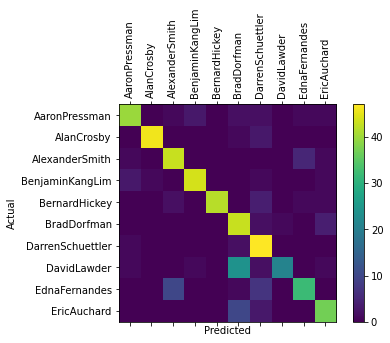

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

labels=["AaronPressman","AlanCrosby","AlexanderSmith","BenjaminKangLim","BernardHickey","BradDorfman","DarrenSchuettler","DavidLawder","EdnaFernandes","EricAuchard"]
cm = confusion_matrix(y_act, y_pred_authors, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.xaxis.set_ticklabels(labels, rotation = 90) 
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5(b) Neural Network Solution on Real Data
## Further Process Data

In [59]:
vocab, idf = create_vocab_and_idf(train_processed_2)
train_w2v_averaged = convert_to_w2v_sentence_averaged(train_processed_2, vocab, idf)
test_w2v_averaged = convert_to_w2v_sentence_averaged(test_processed_2, vocab, idf)

In [60]:
training_data = []
testing_data = []
for author in authors:
    for document in train_w2v_averaged[author]:
        training_data.append(convert_document_to_torch_input(document))
    for document in test_w2v_averaged[author]:
        testing_data.append(convert_document_to_torch_input(document))

In [61]:
jumbled_training_data = []
for i in range(len(train_w2v_averaged[author])):
    for author in authors:
        jumbled_training_data.append(convert_document_to_torch_input(train_w2v_averaged[author][i]))

## Model Training

In [62]:
torch.manual_seed(0)
model = FindAuthor()
loss_function = nn.NLLLoss()
optimizer = optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

for epoch in range(300):  
    tags = []
    for i in range(len(jumbled_training_data)):
        model.zero_grad()
        document = jumbled_training_data[i]
        tags.append(model(document))
        # Mini batch gradient descent
        if i % 10 == 9:
            tag_scores = torch.cat(tags)
            loss = loss_function(tag_scores, jumbled_targets[:10])
            loss.backward()
            optimizer.step()
            tags = []
    print(loss)
    if loss < 0.001:
        print(epoch)
        break

tensor(0.8583, grad_fn=<NllLossBackward>)
tensor(0.5638, grad_fn=<NllLossBackward>)
tensor(0.3366, grad_fn=<NllLossBackward>)
tensor(0.1881, grad_fn=<NllLossBackward>)
tensor(0.0729, grad_fn=<NllLossBackward>)
tensor(0.0364, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.1254, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBackward>)
10


## Training and Testing Accuracy

In [63]:
training_predictions = [np.argmax(model(document).view(-1).detach().numpy()) for document in training_data]
print("Training Accuracy: {}%".format(100*np.mean(targets.detach().numpy() == training_predictions)))

Training Accuracy: 100.0%


In [64]:
testing_predictions = [np.argmax(model(document).view(-1).detach().numpy()) for document in testing_data]
print("Testing Accuracy: {}%".format(100*np.mean(targets.detach().numpy() == testing_predictions)))

Testing Accuracy: 87.0%


In [65]:
#convert to authors

y_pred = testing_predictions
y_pred_authors = []
for i in range (len(testing_predictions)):
    if y_pred[i] == 0:
        y_pred_authors.append("AaronPressman")
    elif y_pred[i] == 1:
        y_pred_authors.append("AlanCrosby")
    elif y_pred[i] == 2:
        y_pred_authors.append("AlexanderSmith")
    elif y_pred[i] == 3:
        y_pred_authors.append("BenjaminKangLim")
    elif y_pred[i] == 4:
        y_pred_authors.append("BernardHickey")
    elif y_pred[i] == 5:
        y_pred_authors.append("BradDorfman")
    elif y_pred[i] == 6:
        y_pred_authors.append("DarrenSchuettler")
    elif y_pred[i] == 7:
        y_pred_authors.append("DavidLawder")
    elif y_pred[i] == 8:
        y_pred_authors.append("EdnaFernandes")
    elif y_pred[i] == 9:
        y_pred_authors.append("EricAuchard")

[[47  0  1  0  0  1  0  0  0  1]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 1  0 44  1  1  1  0  0  1  1]
 [ 0  0  0 49  0  0  1  0  0  0]
 [ 0  0  1  3 40  2  4  0  0  0]
 [ 0  0  2  1  0 40  2  0  1  4]
 [ 0  0  1  2  3  0 44  0  0  0]
 [ 0  0  0  0  0  8  0 40  2  0]
 [ 0  0  2  2  2  0  0  6 38  0]
 [ 3  0  2  0  0  1  0  0  1 43]]


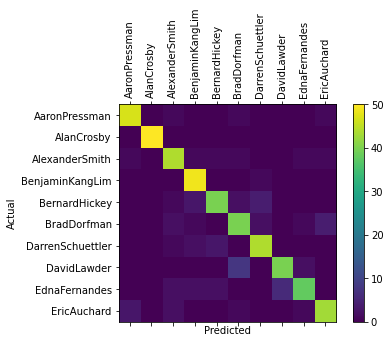

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

labels=["AaronPressman","AlanCrosby","AlexanderSmith","BenjaminKangLim","BernardHickey","BradDorfman","DarrenSchuettler","DavidLawder","EdnaFernandes","EricAuchard"]
cm = confusion_matrix(y_act, y_pred_authors, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.xaxis.set_ticklabels(labels, rotation = 90) 
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()